<a href="https://colab.research.google.com/github/Procuste34/Cours-Reseaux-de-Neurones/blob/main/viz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [50]:
m=512
X = np.random.random((2, m))
Y_classes = ((X[0, :] > 0.5).astype(np.float64) + (X[1, :] > 0.5).astype(np.float64)).reshape(1, m)
Y = ((X[0, :] > 0.5).astype(np.float64) + (X[1, :] > 0.5).astype(np.float64)).reshape(1, m)

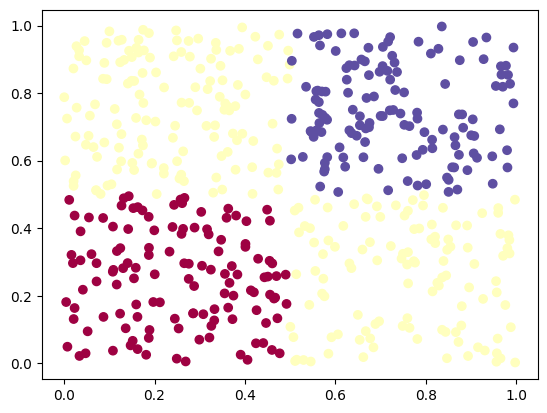

In [51]:
plt.scatter(X[0, :], X[1, :], c=Y[0, :], cmap=plt.cm.Spectral)

In [52]:
import torch
import torch.nn.functional as F

In [53]:
X = X.astype(np.float32)
Y = Y.astype(np.int64)

X = torch.from_numpy(X)
Y = torch.from_numpy(Y).long()
Y = torch.nn.functional.one_hot((Y.reshape(m,))).T.double()

In [54]:
W_1 = torch.rand((2, 2))
b_1 = torch.zeros((2, 1))

W_2 = torch.rand((2, 2))
b_2 = torch.zeros((2, 1))

W_3 = torch.rand((3, 2))
b_3 = torch.zeros((3, 1))

W_1.requires_grad = True
b_1.requires_grad = True
W_2.requires_grad = True
b_2.requires_grad = True
W_3.requires_grad = True
b_3.requires_grad = True

lr = 0.01

In [56]:
for i in range(10000):
  Z_1 = torch.matmul(W_1, X) + b_1
  A_1 = torch.tanh(Z_1)

  Z_2 = torch.matmul(W_2, A_1) + b_2
  A_2 = torch.tanh(Z_2)

  Z_3 = torch.matmul(W_3, A_2) + b_3

  loss = F.cross_entropy(Z_3.T, Y.T)

  if(i%1000==0):
        print(loss)

  W_1.grad = None
  b_1.grad = None
  W_2.grad = None
  b_2.grad = None
  W_3.grad = None
  b_3.grad = None

  loss.backward()

  W_1.data += -lr * W_1.grad
  b_1.data += -lr * b_1.grad
  W_2.data += -lr * W_2.grad
  b_2.data += -lr * b_2.grad
  W_3.data += -lr * W_3.grad
  b_3.data += -lr * b_3.grad

tensor(0.2602, dtype=torch.float64, grad_fn=<DivBackward1>)
tensor(0.2241, dtype=torch.float64, grad_fn=<DivBackward1>)
tensor(0.1924, dtype=torch.float64, grad_fn=<DivBackward1>)
tensor(0.1662, dtype=torch.float64, grad_fn=<DivBackward1>)
tensor(0.1453, dtype=torch.float64, grad_fn=<DivBackward1>)
tensor(0.1286, dtype=torch.float64, grad_fn=<DivBackward1>)
tensor(0.1153, dtype=torch.float64, grad_fn=<DivBackward1>)
tensor(0.1047, dtype=torch.float64, grad_fn=<DivBackward1>)
tensor(0.0961, dtype=torch.float64, grad_fn=<DivBackward1>)
tensor(0.0891, dtype=torch.float64, grad_fn=<DivBackward1>)


In [57]:
def predict(X):
    #h = 0
    #return h >= 0.5

    Z_1 = torch.matmul(W_1, X) + b_1
    A_1 = torch.tanh(Z_1)

    Z_2 = torch.matmul(W_2, A_1) + b_2
    A_2 = torch.tanh(Z_2)

    Z_3 = torch.matmul(W_3, A_2) + b_3
    A_3 = torch.softmax(Z_3, axis=0)

    #Z_4 = torch.matmul(W_4, A_3) + b_4
    #A_4 = torch.sigmoid(Z_4)

    return torch.argmax(A_3, axis=0)

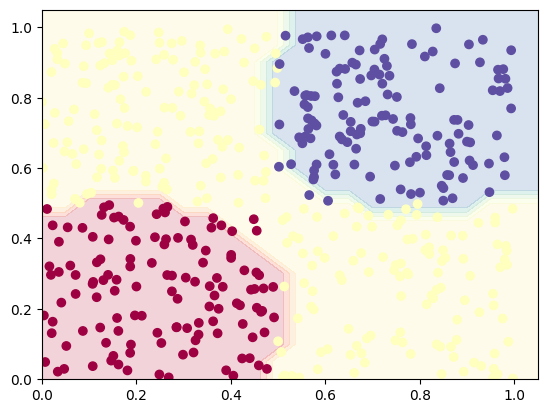

In [58]:
xx, yy = np.meshgrid(np.arange(0, 1.1, 0.05), np.arange(0, 1.1, 0.05))
X_disp = np.c_[xx.ravel(), yy.ravel()]

#h = _sigmoid(w_1*X_disp[:, 0] + w_2*X_disp[:, 1] + b) > 0.5
h = predict(torch.from_numpy(X_disp.T.astype(np.float32)))
h = h.reshape(xx.shape)

plt.contourf(xx, yy, h, cmap=plt.cm.Spectral, alpha=0.2)
plt.scatter(X[0, :], X[1, :], c=Y_classes[0, :], cmap=plt.cm.Spectral)

In [27]:
zieger = plt.imread('ziegler.png')

def show_scatterplot(X, colors, title='', axis=False):
    colors = zieger[colors[:,0], colors[:,1]]
    #X = X.numpy()
    # plt.figure()
    plt.axis('equal')
    plt.scatter(X[:, 0], X[:, 1], c=colors, s=30)
    # plt.grid(True)
    plt.title(title)
    #plt.axis('off')
    _m, _c = 0, '.15'
    if axis:
        plt.axvline(0, ymin=_m, color=_c, lw=1, zorder=0)
        plt.axhline(0, xmin=_m, color=_c, lw=1, zorder=0)

In [28]:
X = torch.randn(1000, 2)
H = (torch.tanh(X)+1)/2 #recentrer dans l'intervalle [0,1]^2

In [29]:
x_min = -1
x_max = +1
colors = (X - x_min) / (x_max - x_min)
colors =  (colors * 511).short().numpy()
colors = np.clip(colors, 0, 511)

In [31]:
Z_1 = torch.matmul(W_1, H.T) + b_1
A_1 = torch.tanh(Z_1)

Z_2 = torch.matmul(W_2, A_1) + b_2
A_2 = torch.tanh(Z_2)

Z_3 = torch.matmul(W_3, A_2) + b_3
A_3 = torch.softmax(Z_3, axis=0)

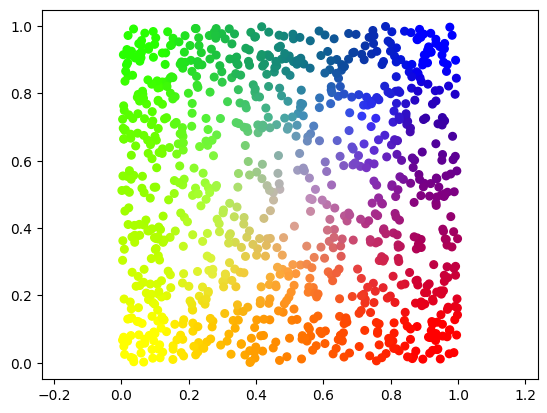

In [32]:
show_scatterplot(H, colors)

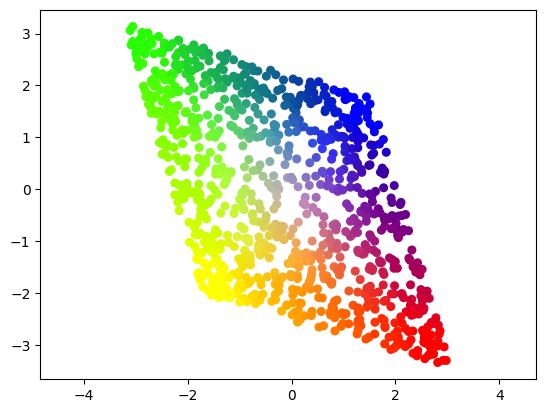

In [33]:
show_scatterplot(Z_1.detach().T, colors)

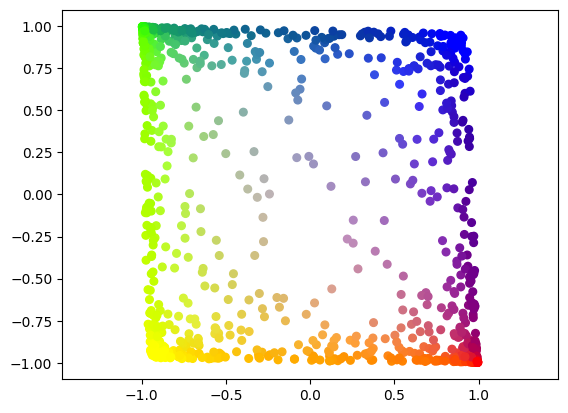

In [34]:
show_scatterplot(A_1.detach().T, colors)

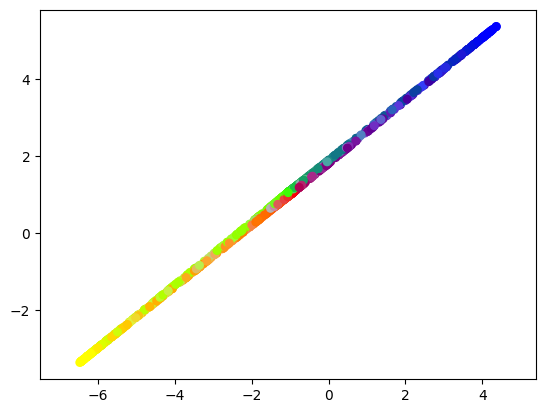

In [35]:
show_scatterplot(Z_2.detach().T, colors)

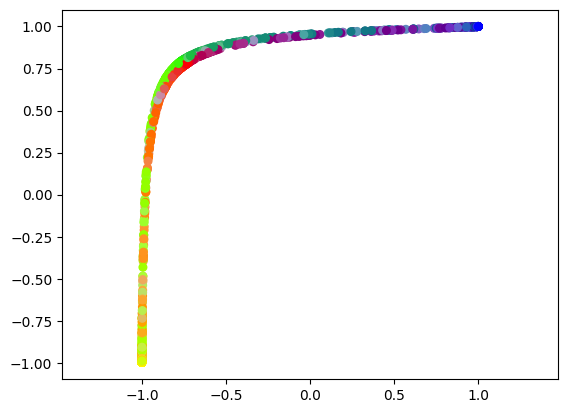

In [36]:
show_scatterplot(A_2.detach().T, colors)

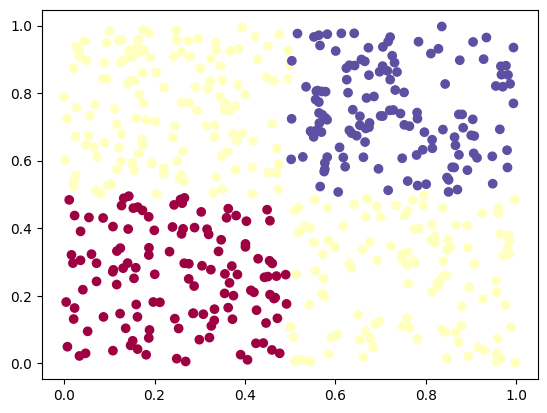

In [59]:
plt.scatter(X[0, :], X[1, :], c=Y_classes[0, :], cmap=plt.cm.Spectral)

In [60]:
Z_1 = torch.matmul(W_1, X) + b_1
A_1 = torch.tanh(Z_1)

Z_2 = torch.matmul(W_2, A_1) + b_2
A_2 = torch.tanh(Z_2)

Z_3 = torch.matmul(W_3, A_2) + b_3
A_3 = torch.softmax(Z_3, axis=0)

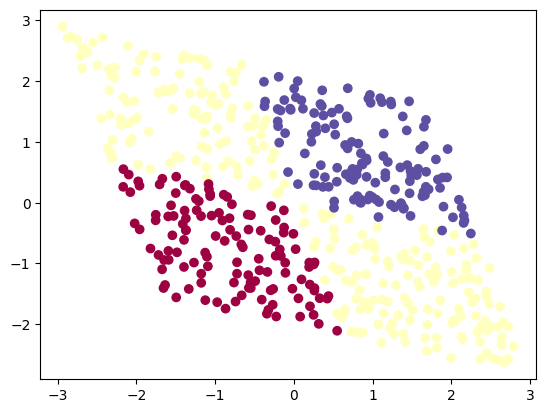

In [62]:
plt.scatter(Z_1[0, :].detach(), Z_1[1, :].detach(), c=Y_classes[0, :], cmap=plt.cm.Spectral)

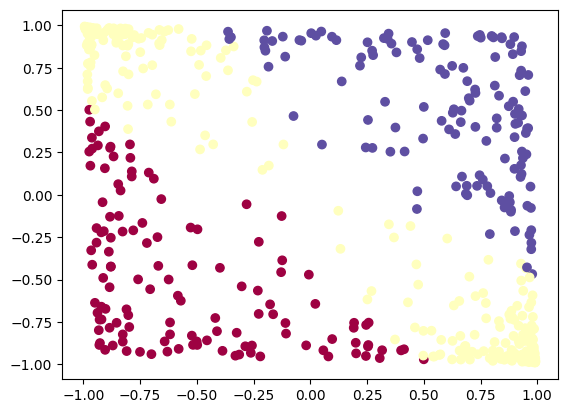

In [63]:
plt.scatter(A_1[0, :].detach(), A_1[1, :].detach(), c=Y_classes[0, :], cmap=plt.cm.Spectral)

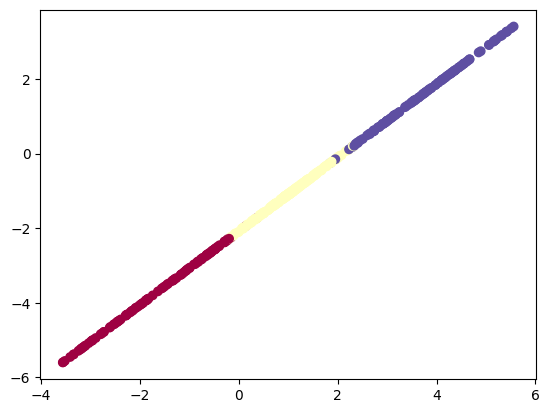

In [64]:
plt.scatter(Z_2[0, :].detach(), Z_2[1, :].detach(), c=Y_classes[0, :], cmap=plt.cm.Spectral)

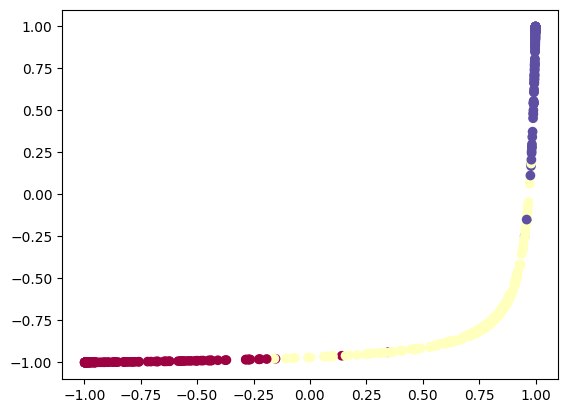

In [65]:
plt.scatter(A_2[0, :].detach(), A_2[1, :].detach(), c=Y_classes[0, :], cmap=plt.cm.Spectral)